In [1]:
import pandas as pd
import numpy as np
import pickle

import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.graphics.tsaplots as tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA as ARIMA
import statsmodels.tsa.api as smt

from utilities import adf_test, kpss_test, tsplot, tsplot2, tsplot3

In [2]:
df = pickle.load( open( "Files and viz/seattle_data.pkl", "rb" ) )

In [3]:
df.head()

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
0,2015-07-02 00:53:00,2015-07-02,74.0,0.0,48.0,CLR,29.94,10.0,Calm,0.0,1282.0
1,2015-07-02 01:53:00,2015-07-02,72.0,0.0,53.0,CLR,29.94,10.0,Variable,3.0,1277.0
2,2015-07-02 02:53:00,2015-07-02,70.0,0.0,55.0,CLR,29.95,10.0,North,3.0,1226.0
3,2015-07-02 03:53:00,2015-07-02,68.0,0.0,59.0,CLR,29.96,10.0,Calm,0.0,1186.0
4,2015-07-02 04:53:00,2015-07-02,68.0,0.0,61.0,CLR,29.97,10.0,West,3.0,1157.0


### Subset data and plot

In [4]:
df = df.iloc[47303-672:47303]

In [5]:
df = df.loc[df.SHORTDATE > '2021-02-01']

In [6]:
df.reset_index(inplace=True, drop=True)

<Figure size 1152x576 with 0 Axes>

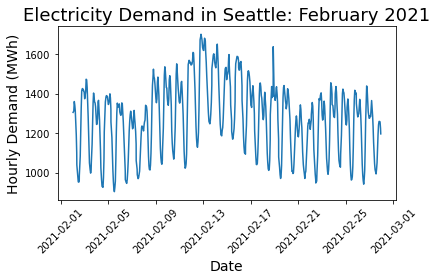

In [7]:
fig = plt.figure(figsize=(16,8))
fig,ax = plt.subplots()
ax.plot(df['DATE'], df['DEMAND'])
ax.set_title('Electricity Demand in Seattle: February 2021', fontsize=18)
ax.set_ylabel('Hourly Demand (MWh)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.xticks(rotation = 45)
plt.tight_layout()

## Determining Time Series components: Testing for stationarity

### ADF Test

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root.

Alternate Hypothesis: The series has no unit root.

If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

A function is created to carry out the ADF test on a time series.

In [9]:
adf_test(df.DEMAND)

Results of Dickey-Fuller Test:
Test Statistic                 -1.2316615616522
p-value                         0.6598296115837
#Lags Used                     19.0000000000000
Number of Observations Used   603.0000000000000
Critical Value (1%)            -3.4412411375397
Critical Value (5%)            -2.8663450276570
Critical Value (10%)           -2.5693289691124
dtype: float64


Based upon the significance level of 0.05 and the high p-value of ADF test, the null hypothesis cannot be rejected. Hence, the ADF test suggests the series can be concluded as non-stationary. **ADF indicates Non-stationarity.**

### KPSS Test

KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

A function is created to carry out the KPSS test on a time series.

In [11]:
kpss_test(df.DEMAND)

Results of KPSS Test:
Test Statistic           0.4786995394486
p-value                  0.0464640676918
Lags Used               14.0000000000000
Critical Value (10%)     0.3470000000000
Critical Value (5%)      0.4630000000000
Critical Value (2.5%)    0.5740000000000
Critical Value (1%)      0.7390000000000
dtype: float64


Based upon the significance level of 0.05 and the p-value of KPSS test, there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test. **KPSS indicates non-stationarity.**

*Outcomes of the two statistical tests for stationarity: KPSS indicates non-stationarity and ADF indicates non-stationarity - The series may be difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.*

## ACF and PACF Plots

### Apply differencing and rerun statistical tests

In [14]:
diff_1 = df.DEMAND.diff()
diff_1 = diff_1.dropna()

#### ACF Plot with differencing of 1

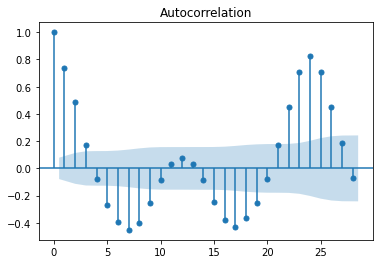

In [15]:
tsa.plot_acf(diff_1, alpha=0.05)
plt.show()

In [16]:
diff_2 = diff_1.diff()
diff_2 = diff_2.dropna()

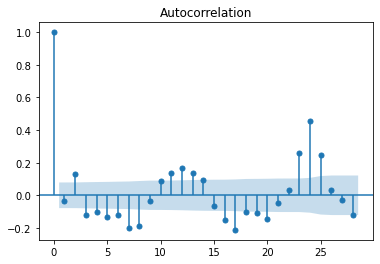

In [17]:
tsa.plot_acf(diff_2, alpha=0.05)
plt.show()

**Describe acf plot of differencing 2**

## acf plot with diff 3

In [18]:
diff_3 = diff_2.diff()
diff_3 = diff_3.dropna()

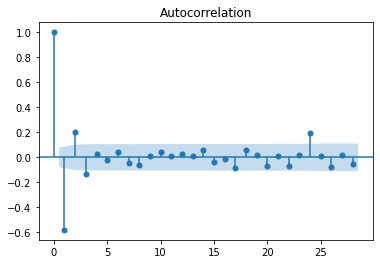

In [19]:
tsa.plot_acf(diff_3, alpha=0.05)
plt.show()

**Describe acf plot of differencing 3, and why it is too much differencing**

## Statistical Tests with Differenced Data

### With difference 1

In [21]:
adf_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -18.4968332027827
p-value                         0.0000000000000
#Lags Used                     19.0000000000000
Number of Observations Used   602.0000000000000
Critical Value (1%)            -3.4412593071503
Critical Value (5%)            -2.8663530294137
Critical Value (10%)           -2.5693332327458
dtype: float64


Based upon the significance level of 0.05 and the very low p-value of ADF test, the null hypothesis can be rejected. Hence, the ADF test suggests the series cannot be concluded as non-stationary. **ADF indicates Stationarity.**

### KPSS Test

In [23]:
kpss_test(diff_1)

Results of KPSS Test:
Test Statistic           0.0082228107555
p-value                  0.1000000000000
Lags Used               10.0000000000000
Critical Value (10%)     0.3470000000000
Critical Value (5%)      0.4630000000000
Critical Value (2.5%)    0.5740000000000
Critical Value (1%)      0.7390000000000
dtype: float64


/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## differencing by 1 and 24

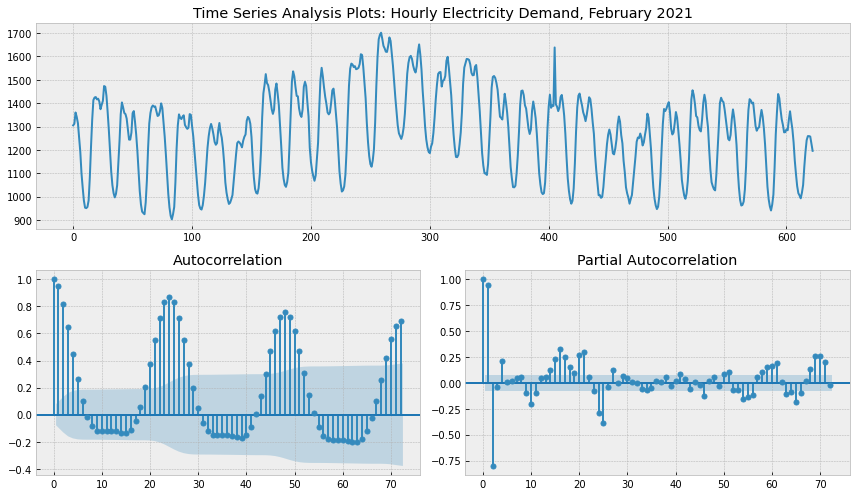

In [27]:
tsplot(df.DEMAND, lags=72)

Looking at a plot of the raw time series on top, we can already see some indicators of non-stationarity. We can see the mean is nonconstant and the repetitive fork-like intervals suggest some type of seasonality. The similar amplitude and frequency of the intervals suggest our time series is additive.

The ACF plot on the left shows a strong correlation between the observation at time t and neighboring observations, confirming an autoregressive process. We can also see there is a strong correlation between the observation at time t and at time t-24 by looking at the peaks in the plot. This confirms at least one seasonal component to the data that we take care to smooth out.

In the case of the PACF plot, we see a sharp dropoff at the second residual, again confirming an autoregressive process, and not a moving average process.

Based on our findings here we can try differencing at lag 1 and lag 24 to see if that makes the data stationary.


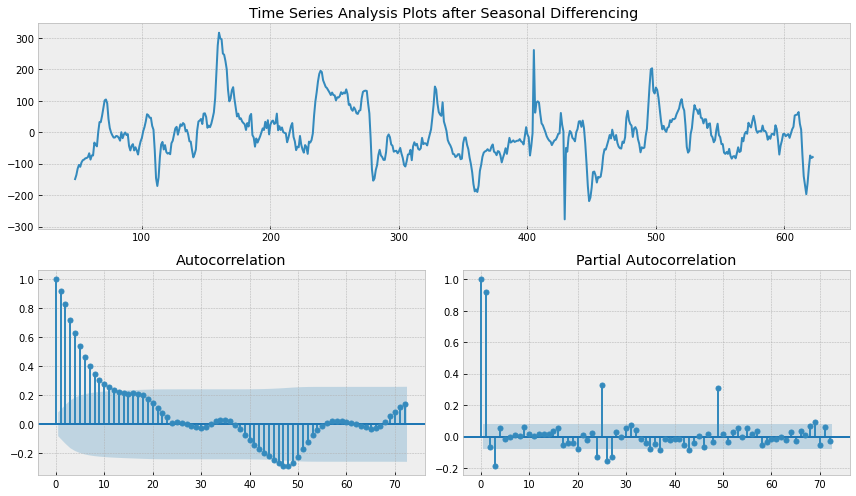

In [28]:
demand_diff = df.DEMAND - df.DEMAND.shift(24)
demand_diff = demand_diff.dropna()
tsplot3(demand_diff[24:], lags=72)

It is now much better with the visible seasonality gone. However, the autocorrelation function still has too many significant lags. To remove them, we'll take first differences, subtracting the series from itself with lag 1.

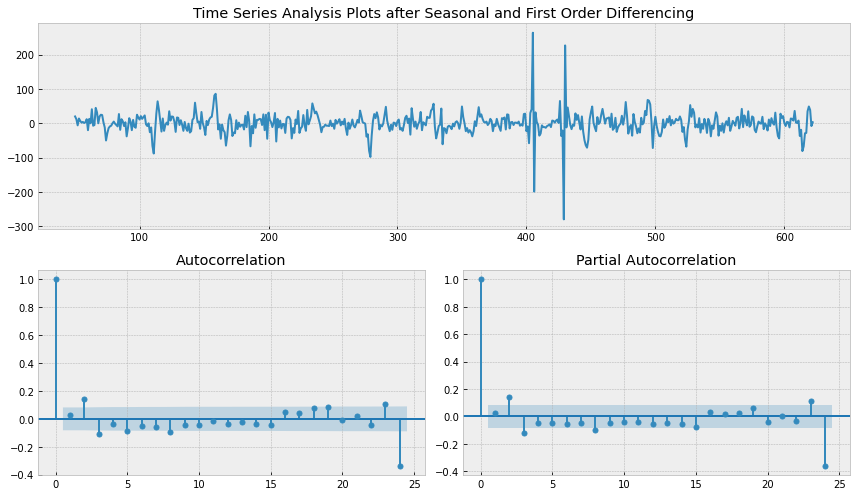

In [30]:
demand_diff = demand_diff - demand_diff.shift(1)
demand_diff = demand_diff.dropna()
tsplot2(demand_diff[24+1:], lags=24)

In [ ]:
kpss_test(demand_diff)

In [ ]:
adf_test(demand_diff)

### Differenced data passes the statistical tests after seasonal and first order differencing

In [ ]:
with open('final_small_data.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)